In [1]:
from pystencils.session import *
from pystencils.fd.derivation import *

# 2D standard stencils


In [2]:
stencil = [(-1, 0), (1, 0), (0, -1), (0, 1), (0, 0)]
standard_2d_00 = FiniteDifferenceStencilDerivation((0,0), stencil)
f = ps.fields("f: [2D]")
standard_2d_00_res = standard_2d_00.get_stencil()
res = standard_2d_00_res.apply(f.center)
expected = f[-1, 0] - 2 * f[0, 0] + f[1, 0]
assert res == expected

In [3]:
assert standard_2d_00_res.accuracy == 2
assert not standard_2d_00_res.is_isotropic
standard_2d_00_res

Finite difference stencil of accuracy 2, isotropic error: False

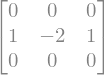

In [4]:
standard_2d_00.get_stencil().as_array()

# 2D isotropic stencils

## second x-derivative

In [5]:
stencil = [(i, j) for i in (-1, 0, 1) for j in (-1, 0, 1)]
isotropic_2d_00 = FiniteDifferenceStencilDerivation((0,0), stencil)
isotropic_2d_00_res = isotropic_2d_00.get_stencil(isotropic=True)
assert isotropic_2d_00_res.is_isotropic
assert isotropic_2d_00_res.accuracy == 2
isotropic_2d_00_res

Finite difference stencil of accuracy 2, isotropic error: True

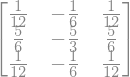

In [6]:
isotropic_2d_00_res.as_array()

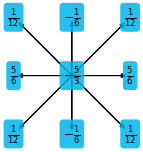

In [7]:
plt.figure(figsize=(2,2))
isotropic_2d_00_res.visualize()

In [8]:
expected_result = sp.Array([[1, -2, 1], [10, -20, 10], [1, -2, 1]]) / 12
assert expected_result == isotropic_2d_00_res.as_array()

## Isotropic laplacian

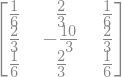

In [9]:
isotropic_2d_11 = FiniteDifferenceStencilDerivation((1,1), stencil)
isotropic_2d_11_res = isotropic_2d_11.get_stencil(isotropic=True)
iso_laplacian = isotropic_2d_00_res.as_array() + isotropic_2d_11_res.as_array()
iso_laplacian

In [10]:
expected_result = sp.Array([[1, 4, 1], [4, -20, 4], [1, 4, 1]]) / 6
assert iso_laplacian == expected_result

# stencils for staggered fields


In [11]:
half = sp.Rational(1, 2)

fd_points_ex = (
    (half, 0),
    (-half, 0),
    (half, 1),
    (half, -1),
    (-half, 1),
    (-half, -1)
)
assert set(fd_points_ex) == set(FiniteDifferenceStaggeredStencilDerivation("E", 2).stencil)

fd_points_ey = (
    (0, half),
    (0, -half),
    (-1,-half),
    (-1, half),
    (1, -half),
    (1, half)
)
assert set(fd_points_ey) == set(FiniteDifferenceStaggeredStencilDerivation("N",2).stencil)

fd_points_c = (
    (half, half),
    (-half, -half),
    (half, -half),
    (-half, half)
)
assert set(fd_points_c) ==  set(FiniteDifferenceStaggeredStencilDerivation("NE",2).stencil)

assert len(FiniteDifferenceStaggeredStencilDerivation("E",3).points) == 10
assert len(FiniteDifferenceStaggeredStencilDerivation("NE",3).points) == 12
assert len(FiniteDifferenceStaggeredStencilDerivation("TNE",3).points) == 8

In [12]:
c = ps.fields("c: [2D]")
c3 = ps.fields("c3: [3D]")

assert FiniteDifferenceStaggeredStencilDerivation("E", 2, (0,)).apply(c.center) == c[1, 0] - c[0, 0]
assert FiniteDifferenceStaggeredStencilDerivation("W", 2, (0,)).apply(c.center) == c[0, 0] - c[-1, 0]
assert FiniteDifferenceStaggeredStencilDerivation("N", 2, (1,)).apply(c.center) == c[0, 1] - c[0, 0]
assert FiniteDifferenceStaggeredStencilDerivation("S", 2, (1,)).apply(c.center) == c[0, 0] - c[0, -1]

assert FiniteDifferenceStaggeredStencilDerivation("E", 3, (0,)).apply(c3.center) == c3[1, 0, 0] - c3[0, 0, 0]
assert FiniteDifferenceStaggeredStencilDerivation("W", 3, (0,)).apply(c3.center) == c3[0, 0, 0] - c3[-1, 0, 0]
assert FiniteDifferenceStaggeredStencilDerivation("N", 3, (1,)).apply(c3.center) == c3[0, 1, 0] - c3[0, 0, 0]
assert FiniteDifferenceStaggeredStencilDerivation("S", 3, (1,)).apply(c3.center) == c3[0, 0, 0] - c3[0, -1, 0]
assert FiniteDifferenceStaggeredStencilDerivation("T", 3, (2,)).apply(c3.center) == c3[0, 0, 1] - c3[0, 0, 0]
assert FiniteDifferenceStaggeredStencilDerivation("B", 3, (2,)).apply(c3.center) == c3[0, 0, 0] - c3[0, 0, -1]

assert FiniteDifferenceStaggeredStencilDerivation("S", 2, (0,)).apply(c.center) == \
       (c[1, 0] + c[1, -1] - c[-1, 0] - c[-1, -1])/4

assert FiniteDifferenceStaggeredStencilDerivation("NE", 2, (0,)).apply(c.center) + \
       FiniteDifferenceStaggeredStencilDerivation("NE", 2, (1,)).apply(c.center) == c[1, 1] - c[0, 0]
assert FiniteDifferenceStaggeredStencilDerivation("NE", 3, (0,)).apply(c3.center) + \
       FiniteDifferenceStaggeredStencilDerivation("NE", 3, (1,)).apply(c3.center) == c3[1, 1, 0] - c3[0, 0, 0]

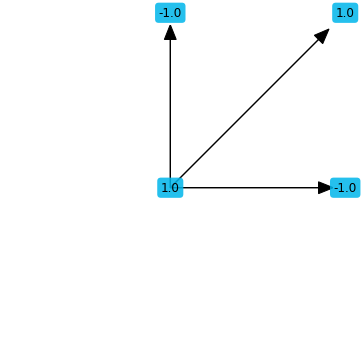

In [13]:
d = FiniteDifferenceStaggeredStencilDerivation("NE", 2, (0, 1))
assert d.apply(c.center) == c[0,0] + c[1,1] - c[1,0] - c[0,1]
d.visualize()

In [14]:
v3 = ps.fields("v(3): [3D]")
for i in range(*v3.index_shape):
    assert FiniteDifferenceStaggeredStencilDerivation("E", 3, (0,)).apply(v3.center_vector[i]) == \
           v3[1,0,0](i) - v3[0,0,0](i)